In [ ]:
pip install pandas-datareader


In [ ]:
import yfinance
tesla=yfinance.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3582 entries, 2010-06-29 to 2024-09-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3582 non-null   float64
 1   High       3582 non-null   float64
 2   Low        3582 non-null   float64
 3   Close      3582 non-null   float64
 4   Adj Close  3582 non-null   float64
 5   Volume     3582 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.9 KB


In [ ]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000
2024-09-17,229.449997,234.570007,226.550003,227.869995,227.869995,66761600
2024-09-18,230.089996,235.679993,226.880005,227.199997,227.199997,78010200
2024-09-19,234.000000,244.240005,232.130005,243.919998,243.919998,102694600
2024-09-20,241.520004,243.990005,235.919998,238.250000,238.250000,99760300


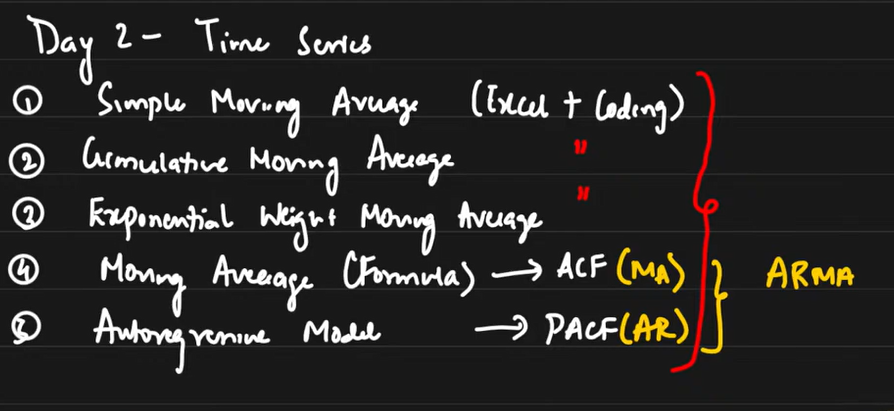

# **Sample Moving Average**
smoothening the curve

min-period=value -- instead of NaN we paste the original val

In [ ]:
tesla.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Figure size 10000x1000 with 0 Axes>

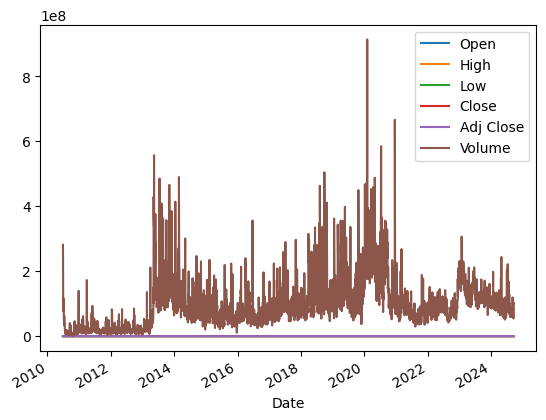

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,10))
tesla.plot()
plt.show()

In [ ]:
rolling_open=tesla['Open'].rolling(window=4).mean()
date=tesla.index

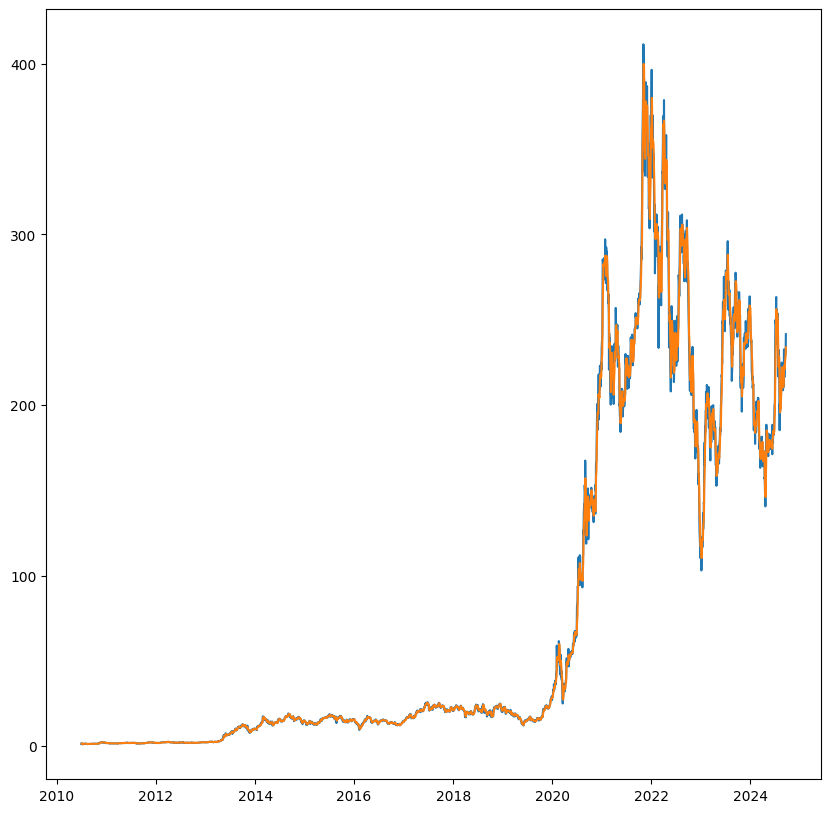

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(date,tesla['Open'])
plt.plot(date,rolling_open)



In [ ]:
rolling_open_10=tesla['Open'].rolling(window=10,min_periods=1).mean()
rolling_open_10

,Open
Date,
2010-06-29,1.266667
2010-06-30,1.493000
2010-07-01,1.550889
2010-07-02,1.546500
2010-07-06,1.503867
...,...
2024-09-16,222.472002
2024-09-17,223.891002
2024-09-18,225.841002


In [ ]:
rolling_open_30=tesla['Open'].rolling(window=30).mean()
rolling_open_40=tesla['Open'].rolling(window=40).mean()

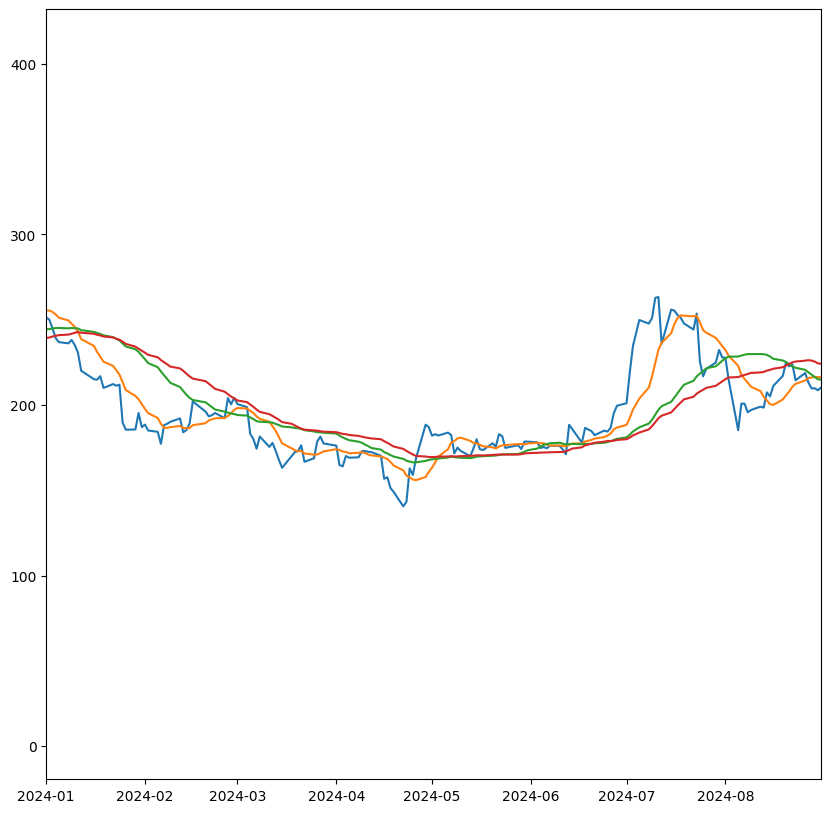

In [ ]:
import pandas as pd
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-8-31')
plt.figure(figsize=(10,10))
plt.plot(date,tesla['Open'])
plt.plot(date,rolling_open_10)
plt.plot(date,rolling_open_30)
plt.plot(date,rolling_open_40)
plt.xlim(start_date,end_date)
plt.show()


**Dis Advantage**

*   giving importance to all data ('for time series we should give more weight to recent data')



# **Cummuilative moving average**

In [ ]:
cma=tesla['Open'].expanding().mean()
cma

,Open
Date,
2010-06-29,1.266667
2010-06-30,1.493000
2010-07-01,1.550889
2010-07-02,1.546500
2010-07-06,1.503867
...,...
2024-09-16,76.782095
2024-09-17,76.824752
2024-09-18,76.867564


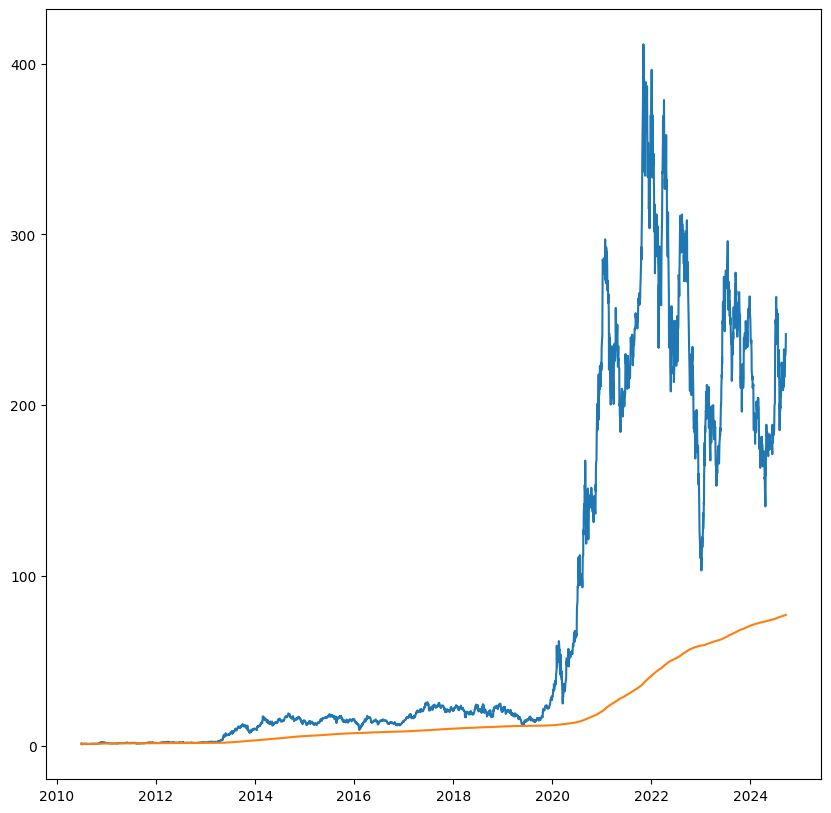

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(date,tesla['Open'])
plt.plot(date,cma)

# **Exponential moving average**
EMAToday=( ValueToday*(Constant/ (1+No. Of Days)) )+( EMAYesterday*(1-(Constant/(1+No. Of Days))) )

((close-previous_EMA)*multiplier)+previous_EMA

where, multiplier = 2/(winsize+1)

In [ ]:
ema=tesla['Open'].ewm( alpha=0.1).mean()
ema

,Open
Date,
2010-06-29,1.266667
2010-06-30,1.504912
2010-07-01,1.564600
2010-07-02,1.555508
2010-07-06,1.501254
...,...
2024-09-16,220.158683
2024-09-17,221.087814
2024-09-18,221.988032


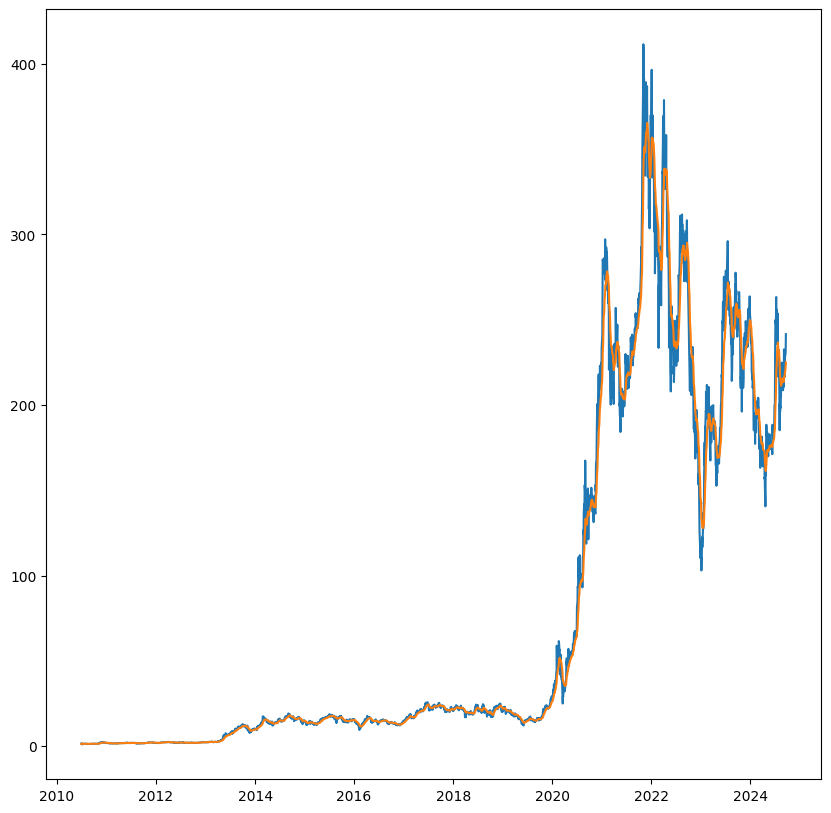

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(date,tesla['Open'])
plt.plot(date,ema)

In [ ]:
ema_03=tesla['Open'].ewm( alpha=0.3).mean()
ema_03

,Open
Date,
2010-06-29,1.266667
2010-06-30,1.532941
2010-07-01,1.594003
2010-07-02,1.570051
2010-07-06,1.484689
...,...
2024-09-16,225.513365
2024-09-17,226.694355
2024-09-18,227.713047


(19723.0, 19966.0)

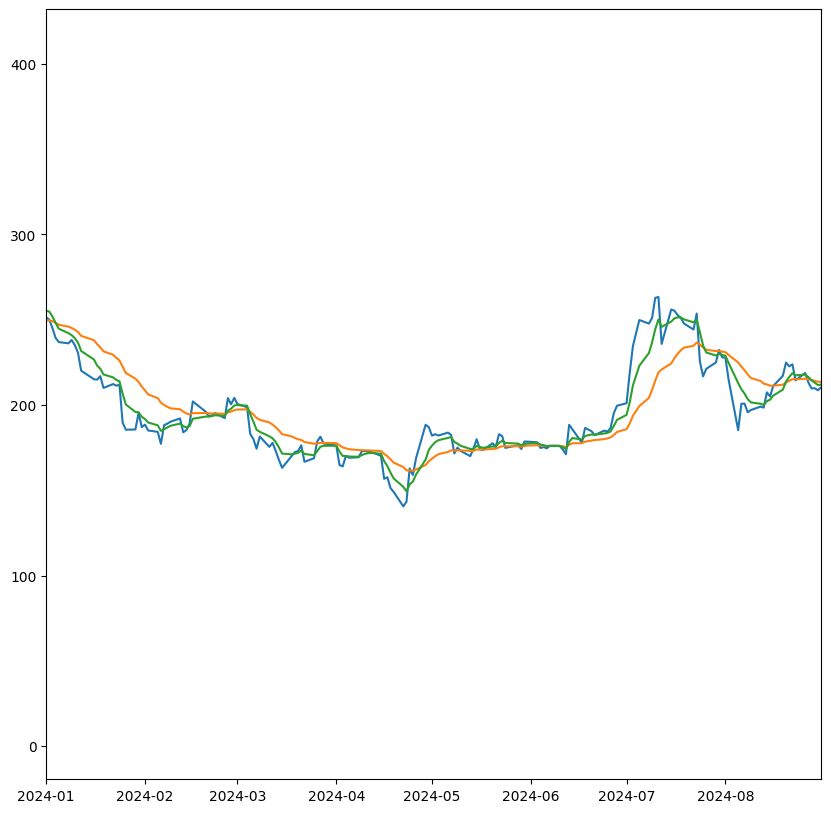

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(date,tesla['Open'])
plt.plot(date,ema)
plt.plot(date,ema_03)
plt.xlim(start_date,end_date)

# **Exponential weighted moving average**

In [ ]:
ewma=tesla['Open'].ewm(span=5).mean()
ewma

,Open
Date,
2010-06-29,1.266667
2010-06-30,1.538267
2010-07-01,1.599088
2010-07-02,1.571774
2010-07-06,1.480240
...,...
2024-09-16,225.979237
2024-09-17,227.136157
2024-09-18,228.120770


(19723.0, 19966.0)

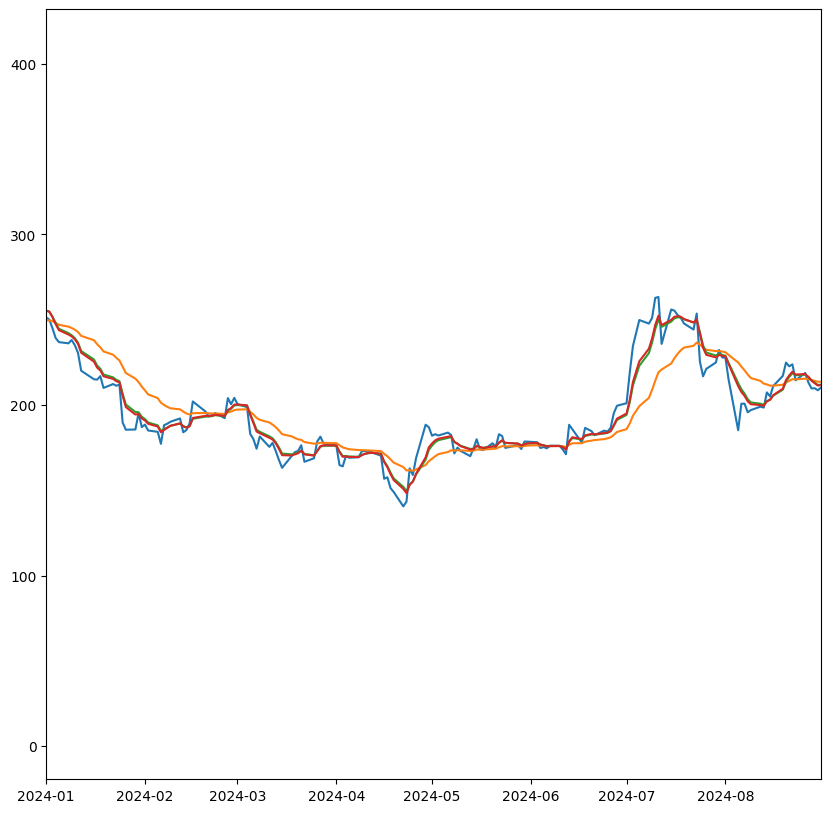

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(date,tesla['Open'])
plt.plot(date,ema)
plt.plot(date,ema_03)
plt.plot(date,ewma)
plt.xlim(start_date,end_date)

# **ARIMA**

1.   AR - PACF
2.   MA - ACF
3.   I  - Differentiation



In [ ]:
df=pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [ ]:
df.rename(columns={'#Passengers':'Passengers'},inplace=True)
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [ ]:
import statsmodels.api as sm

**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
Month,0
Passengers,0


In [ ]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.dtypes

,0
Month,datetime64[ns]
Passengers,int64


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

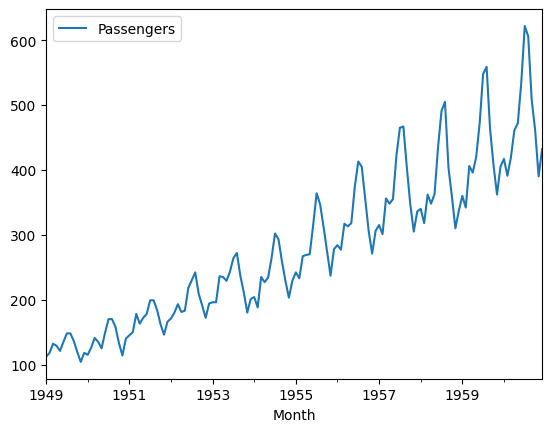

In [ ]:
df.plot()

the data is inthe form of trends , it is not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller  # Import the ADF test

def fun(series):
    result = adfuller(series)
    p_value = result[1]
    a_stat = result[0]
    critical_val = result[4]

    if p_value < 0.05:
        print('We reject the null hypothesis, the series is stationary')
    else:
        print('We accept the null hypothesis, the series is not stationary')

    # Print the results
    print(f'ADF Statistic: {a_stat}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_val.items():
        print(f'   {key}: {value}')


In [ ]:
fun(df['Passengers'])

NameError: name 'df' is not defined

**It is not stationary , so we differentiate it**

In [ ]:
df['difference_of_one']=df['Passengers']-df['Passengers'].shift(1)
df.head()

,Passengers,difference_of_one
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [ ]:
fun(df['difference_of_one'].dropna())

we accept null hypothesis and it is not stationary
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [ ]:
df['difference_of_two']=df['difference_of_one']-df['difference_of_one'].shift(1)

In [ ]:
fun(df['difference_of_two'].dropna())

we reject null hypothesis it is stationary
ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


<Axes: xlabel='Month'>

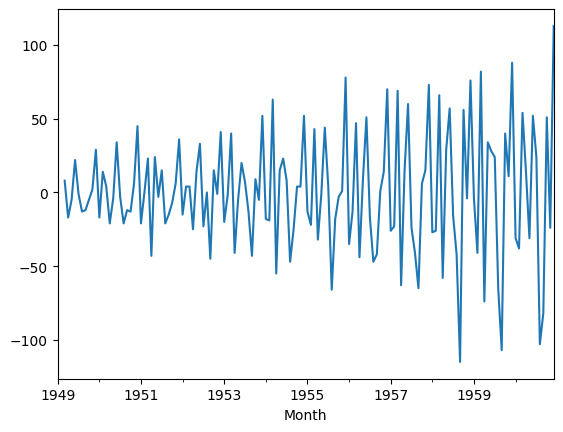

In [ ]:
df['difference_of_two'].plot()

In [ ]:
df['difference_of_12']=df['Passengers']-df['Passengers'].shift(12)
fun(df['difference_of_12'].dropna())

we reject null hypothesis it is stationary
ADF Statistic: -3.383020726492481
p-value: 0.011551493085514952
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


<Axes: xlabel='Month'>

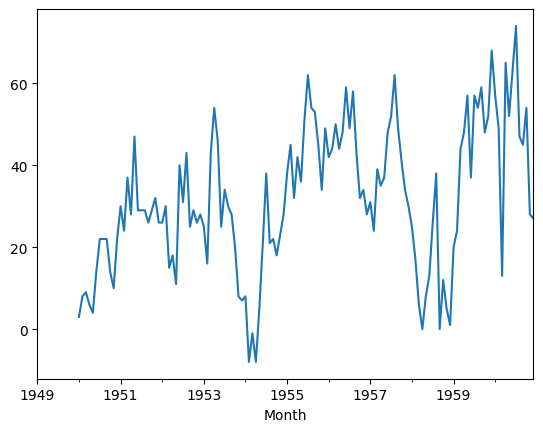

In [ ]:
df['difference_of_12'].plot()

**Selecting P and Q**

pacf - P

acf - Q

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

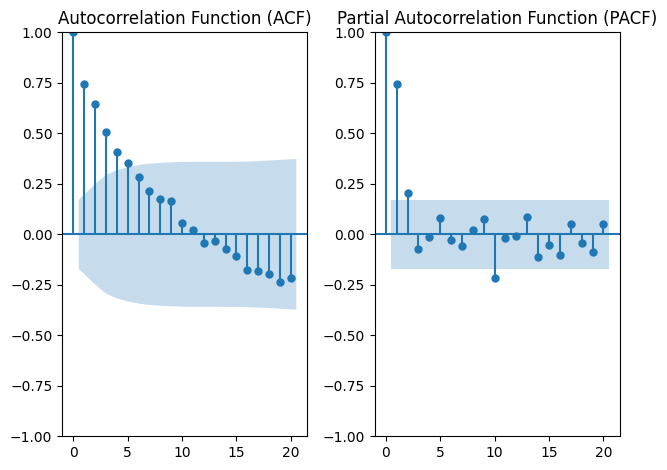

In [ ]:

# Plot ACF
plt.subplot(121)
plot_acf(df['difference_of_12'].dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(122)
plot_pacf(df['difference_of_12'].dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

q=5
p=2 or 10

In [ ]:
# Assume df['difference_of_12'] is your time series data (already differenced for stationarity)
series = df['difference_of_12'].dropna()

# Define the train size (e.g., 80% for training, 20% for testing)
train_size = int(len(series) * 0.8)

# Split the data
train, test = series[:train_size], series[train_size:]

print(f'Training data length: {len(train)}')
print(f'Testing data length: {len(test)}')

Training data length: 105
Testing data length: 27


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p=5
q=3
d=1
# Define the ARIMA model (you can adjust p, d, q based on ACF/PACF analysis)
model = ARIMA(train, order=(p, d, q))  # Replace p, d, q with actual values

# Fit the model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:       difference_of_12   No. Observations:                  105
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -384.284
Date:                Sun, 22 Sep 2024   AIC                            786.568
Time:                        21:11:54   BIC                            810.367
Sample:                    01-01-1950   HQIC                           796.210
                         - 09-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8712      0.167      5.224      0.000       0.544       1.198
ar.L2         -0.7444      0.235     -3.164      0.002      -1.206      -0.283
ar.L3          0.3673      0.231      1.588      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1958-10-01    12.293062
1958-11-01     5.791938
1958-12-01    12.599832
1959-01-01    16.374523
1959-02-01    17.747414
1959-03-01    16.119927
1959-04-01    17.360302
1959-05-01    20.874198
1959-06-01    22.606372
1959-07-01    21.416736
1959-08-01    20.823065
1959-09-01    22.766888
Freq: MS, Name: predicted_mean, dtype: float64


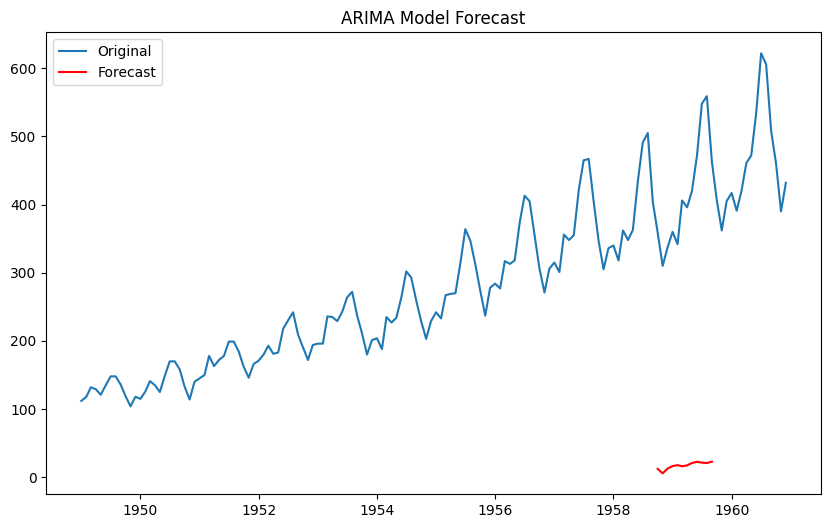

In [ ]:
# Step 4: Make predictions
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months
print(forecast)

# Step 5: Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   difference_of_12   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -558.023
Date:                            Sun, 22 Sep 2024   AIC                           1126.046
Time:                                    21:14:20   BIC                           1140.422
Sample:                                01-01-1949   HQIC                          1131.887
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1183      0.244     -0.485      0.628      -0.597       0.360
ma.L1         -0.3735      0.222   

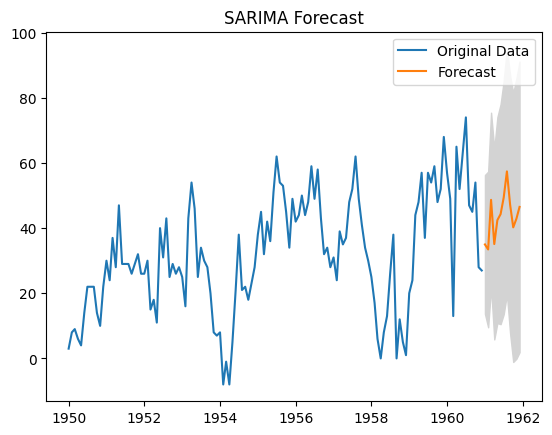

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Step 3: Fit SARIMA Model (p,d,q)(P,D,Q,m) where m=12 for monthly data
model = SARIMAX(df['difference_of_12'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = model.fit()

# Step 4: Model Summary and Forecast
print(sarima_result.summary())

# Forecast future values
forecast = sarima_result.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 5: Plot the forecast
plt.plot(df.index, df['difference_of_12'], label='Original Data')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='lightgrey')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()
